In [2]:
import os


def path_to_csv(file_number):
    filenumber = str(file_number) + '.csv'
    for dirname, _, filenames in os.walk('mitbih_database/'):
        for filename in filenames:
            if (filename == filenumber):
                file_path = os.path.join(dirname, filename)
                # print(os.path.join(dirname, file_number))
                return file_path

csv_path = path_to_csv(104)
print(csv_path)

mitbih_database/104.csv


In [3]:
def path_to_txt(file_number):
    filenumber = str(file_number) + 'annotations.txt'
    for dirname, _, filenames in os.walk('mitbih_database/'):
        for filename in filenames:
            if (filename == filenumber):
                file_path = os.path.join(dirname, filename)
                # print(os.path.join(dirname, file_number))
                return file_path

txt_path = path_to_txt(104)
print(txt_path)

mitbih_database/104annotations.txt


In [4]:
!pip install biosppy

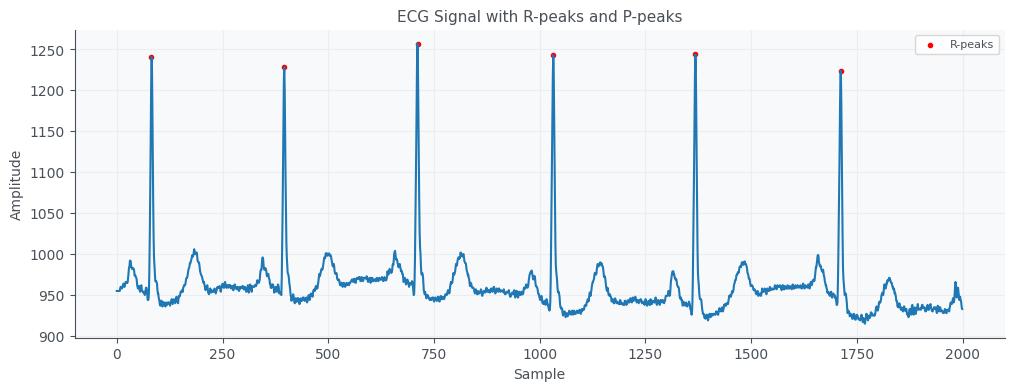

: 

In [11]:
from biosppy.signals import ecg
import pandas as pd
# import wfdb
import numpy as np
import matplotlib.pyplot as plt

path = path_to_csv(101)
df = pd.read_csv(path, delimiter=',')
df.rename(columns = lambda x: x.replace("'","").replace(" ","_"), inplace=True)

ecg_signal = df[0:2000]['MLII'].values
# ecg_signal = record.p_signal.flatten()

# ecg_results = ecg.ecg(signal=ecg_signal, sampling_rate=1000, show=False)
ecg_results = ecg.ssf_segmenter(signal=ecg_signal, sampling_rate=100.0, threshold=200, before=0.03, after=0.01)
# ecg_results = ecg.ecg(signal=ecg_signal, sampling_rate=1000, show=False)

r_peaks = ecg_results['rpeaks']
# p_peaks = ecg_results['ppeaks']

# Plot the ECG signal with R-peaks and P-peaks
plt.figure(figsize=(12, 4))
plt.plot(ecg_signal)
plt.title('ECG Signal with R-peaks and P-peaks')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.scatter(r_peaks, ecg_signal[r_peaks], color='red', marker='.', label='R-peaks')
# plt.scatter(p_peaks, ecg_signal[p_peaks], color='blue', marker='o', label='P-peaks')
plt.legend()
plt.show()

In [6]:
r_peaks

array([  82,  396,  711, 1032, 1368, 1712])

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl.metadata (5.1 kB)
Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\vinit\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [2]:
import tensorflow as tf


if tf.config.list_physical_devices('GPU'):
    print("GPU is available!")
else:
    print("GPU is not available.")

ModuleNotFoundError: No module named 'tensorflow.python'